In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter


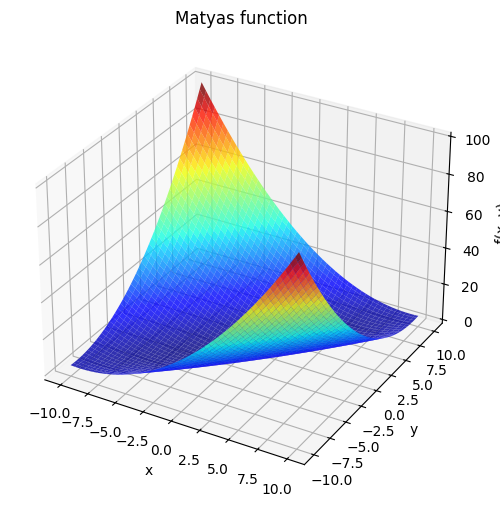

In [4]:
def matyas(x, y):
    return 0.26 * (x**2 + y**2) - 0.48 * x * y

x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
Z = matyas(X, Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.8)
ax.set_title("Matyas function")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()


Найкраще знайдене значення: x = 0.8711, y = 0.6372, f(x, y) = 0.036427


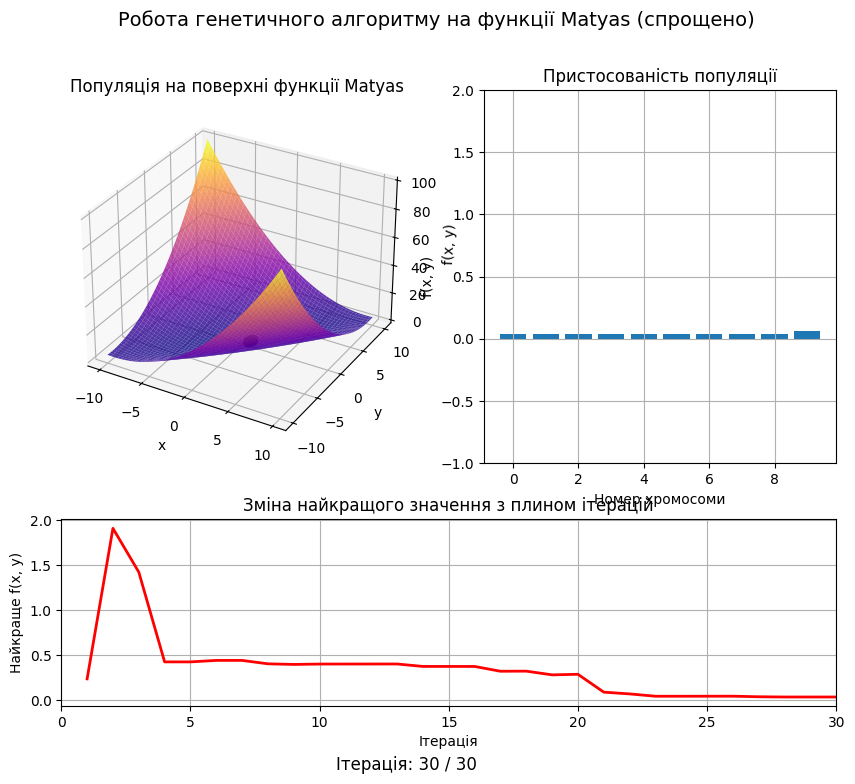

In [8]:
def f(x, y):
    return 0.26 * (x**2 + y**2) - 0.48 * x * y

#Генетичний алгоритм для неперервної популяції
def GA():
    np.random.seed(0)
    PopSize = 10
    MaxIter = 30
    x_range = (-10, 10)
    y_range = (-10, 10)
    mutation_rate = 0.2

    # Початкова популяція
    X = np.random.uniform(x_range[0], x_range[1], PopSize)
    Y = np.random.uniform(y_range[0], y_range[1], PopSize)

    all_generations = []
    best_values = []

    for _ in range(MaxIter):
        Fit = f(X, Y)

        idx = np.argsort(Fit)
        X, Y, Fit = X[idx], Y[idx], Fit[idx]

        all_generations.append((X.copy(), Y.copy(), Fit.copy()))
        best_values.append(Fit[0])

        # Вибір батьків 
        parents_X = X[:PopSize // 2]
        parents_Y = Y[:PopSize // 2]

        children_X = []
        children_Y = []
        for _ in range(PopSize):
            p1, p2 = np.random.randint(len(parents_X)), np.random.randint(len(parents_X))
            alpha = np.random.rand()
            child_x = alpha * parents_X[p1] + (1 - alpha) * parents_X[p2]
            child_y = alpha * parents_Y[p1] + (1 - alpha) * parents_Y[p2]

            # Мутація
            if np.random.rand() < mutation_rate:
                child_x += np.random.uniform(-1, 1)
                child_y += np.random.uniform(-1, 1)

            # Обмеження в межах області
            child_x = np.clip(child_x, *x_range)
            child_y = np.clip(child_y, *y_range)

            children_X.append(child_x)
            children_Y.append(child_y)

        X = np.array(children_X)
        Y = np.array(children_Y)

    BestX, BestY, BestF = X[0], Y[0], f(X[0], Y[0])
    print(f"Найкраще знайдене значення: x = {BestX:.4f}, y = {BestY:.4f}, f(x, y) = {BestF:.6f}")
    return all_generations, best_values


def animate_GA():
    generations, best_values = GA()

    fig = plt.figure(figsize=(10, 8))
    gs = fig.add_gridspec(2, 2, height_ratios=[2, 1])
    fig.suptitle("Робота генетичного алгоритму на функції Matyas (спрощено)", fontsize=14)

    ax1 = fig.add_subplot(gs[0, 0], projection='3d')
    X = np.linspace(-10, 10, 100)
    Y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    ax1.plot_surface(X, Y, Z, cmap='plasma', alpha=0.8)
    scatter = ax1.scatter([], [], [], c='k', s=50)
    ax1.set_title("Популяція на поверхні функції Matyas")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("f(x, y)")

    ax2 = fig.add_subplot(gs[0, 1])
    bars = ax2.bar(range(10), np.zeros(10))
    ax2.set_xlabel("Номер хромосоми")
    ax2.set_ylabel("f(x, y)")
    ax2.set_ylim(-1, 2)
    ax2.set_title("Пристосованість популяції")
    ax2.grid(True)

    ax3 = fig.add_subplot(gs[1, :])
    line_best, = ax3.plot([], [], 'r-', lw=2)
    ax3.set_xlim(0, len(generations))
    ax3.set_ylim(min(best_values) - 0.1, max(best_values) + 0.1)
    ax3.set_xlabel("Ітерація")
    ax3.set_ylabel("Найкраще f(x, y)")
    ax3.set_title("Зміна найкращого значення з плином ітерацій")
    ax3.grid(True)

    title = fig.text(0.4, 0.03, "", fontsize=12)

    def update(frame):
        DecX, DecY, Fit = generations[frame]
        scatter._offsets3d = (DecX, DecY, Fit)
        for bar, height in zip(bars, Fit[:10]):
            bar.set_height(height)
        line_best.set_data(range(1, frame + 2), best_values[:frame + 1])
        title.set_text(f"Ітерація: {frame + 1} / {len(generations)}")
        return scatter, bars, line_best, title

    anim = FuncAnimation(fig, update, frames=len(generations), interval=300, repeat=False)
    anim.save("matyas_simple.gif", writer=PillowWriter(fps=5))
    plt.show()


animate_GA()
